# Introduction

In this notebook it is presented a way to detect fraud transactions. 

The dataset consists of CC transactions whose features are the product of a PCA analysis and thus we don't know what they represent expect from the Amount, Time and Class. Amount is the price of each transaction, Time is the "seconds elapsed between each transaction and the first transaction" and ‘Class’ represents a fraud transaction when its value equals 1 and a valid transaction when its value equals 0

## Exploratory Data Analysis

The data set has 31 features, 28 of which have been anonymized and are labeled V1 through V28. The remaining three features are the time and the amount of the transaction as well as whether that transaction was fraudulent or not. Before it was uploaded to Kaggle, the anonymized variables had been modified in the form of a PCA (Principal Component Analysis). Furthermore, there were no missing values in the data set. Equipped with this basic description of the data, let’s jump into some exploratory data analysis.

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
import pickle


In [31]:
df = pd.read_csv("./creditcard.csv")
print("missing values: ", df.isnull().values.any())

missing values:  False


In [32]:
df.head()
#28 normalized and anonymized features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
# data description
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


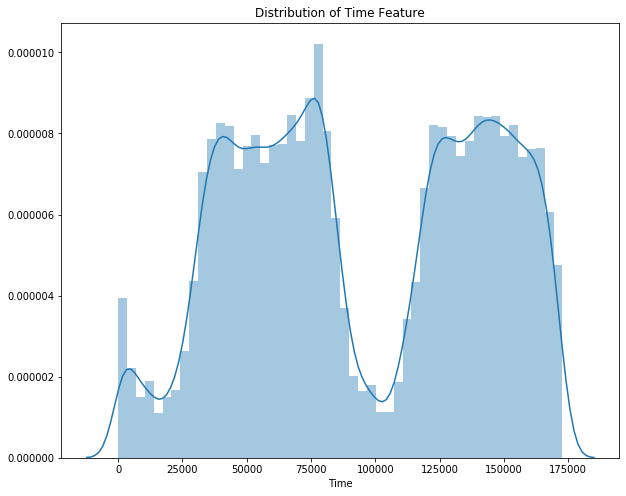

In [35]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

it is bimodal. This indicates that approximately 28 hours after the first transaction there was a significant drop in the volume of transactions. While the time of the first transaction is not provided, it would be reasonable to assume that the drop in volume occurred during the night.

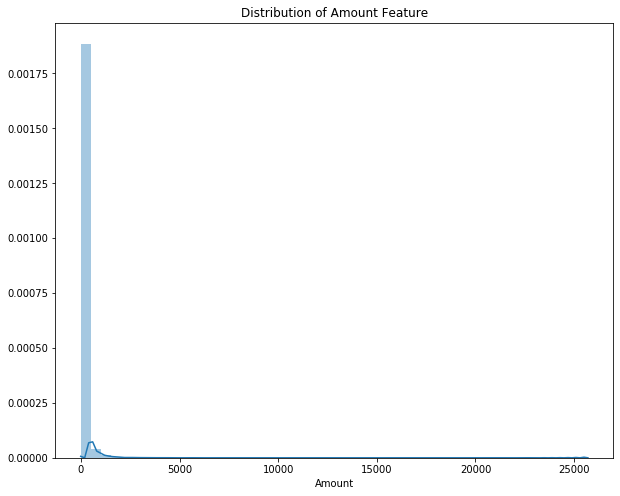

In [36]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount Feature')
sns.distplot(df.Amount)

In [37]:
frauds_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]
frauds_number = len(frauds_df)
non_fraud_number = len(non_fraud_df)
print("fraudelent transactions are " + str(frauds_number))
print("non fraudelent transaction are " + str(non_fraud_number))
ratio = (float(frauds_number) / float(non_fraud_number)) * 100
print(str(ratio)[:5] + "%")
#this shows that the dataset is highly unbalanced

fraudelent transactions are 492
non fraudelent transaction are 284315
0.173%


0    284315
1       492
Name: Class, dtype: int64


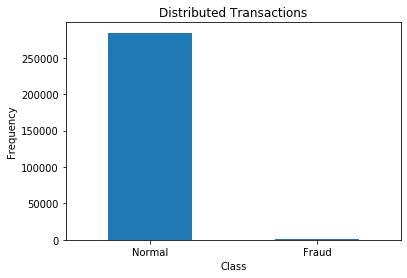

In [38]:
count_classes = pd.value_counts(df['Class'], sort=True)
print(count_classes)
count_classes.plot(kind='bar', rot=0)
plt.title("Distributed Transactions")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Highly unbalanced dataset. Therefore, it is not possible to use any supervised learning algorithm direclty because it will overfit based on the 'Normal' examples.

Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present. If there are few cases of fraud, then there’s little data to learn how to identify them. This is known as class imbalance, and it’s one of the main challenges of fraud detection.

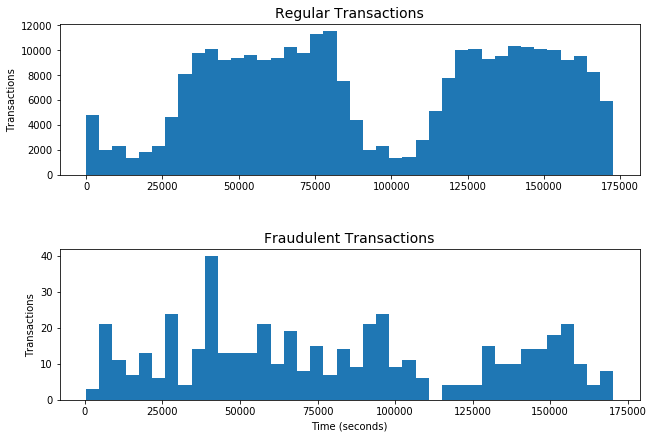

In [41]:
df = pd.read_csv("./creditcard.csv")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(df['Time'][df['Class'] == 0], bins=40)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(df['Time'][df['Class'] == 1], bins=40)
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Time (seconds)')

plt.tight_layout(pad=4.0)

Notice that the number of regular transactions drops sharply around the 90,000th second mark, to surge again around the 110,000th second mark. It wouldn't be absurd to assume that this period is during the night when individuals naturally perform fewer purchases and transactions than during the daytime. On the other hand, a great number of fraudulent transactions occurred around the 100,000 mark, which could confirm the previous assumption, considering that criminals should prefer to commit fraud late at night, assuming there would be less surveillance.

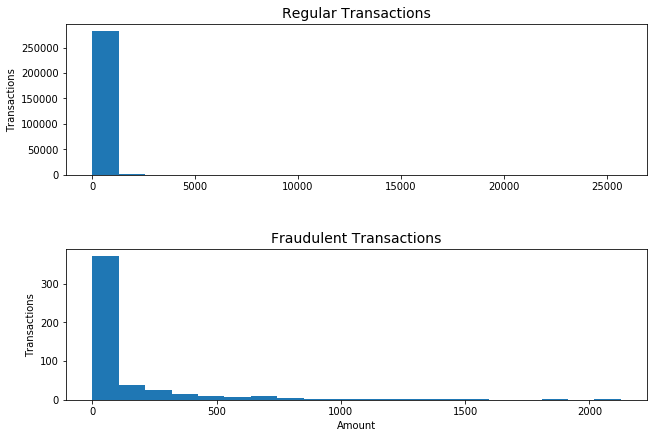

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(df['Amount'][df['Class'] == 0], bins=20)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(df['Amount'][df['Class'] == 1], bins=20)
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Amount')

plt.tight_layout(pad=4.0)

As for the transactions' amount, apparently there is no significant insight we can gather from them. Most transactions, both regular and fraudulent, were of "small" values.

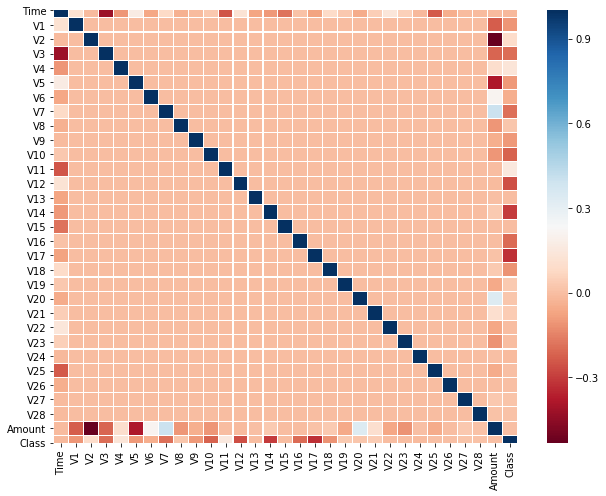

In [44]:
# heatmap correlation 
lol = pd.read_csv("./creditcard.csv")

corr = lol.corr()
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()

There are no highly correlated features. There's a slighjly negative correlation between V2 and Amount. The Amount feature is slightly correlated with the other features ase well hence it can be partially calculated by them, we can drop it (test shows an improvement to the final score). A little correlation between Time and other features.

As you can see, some of our predictors do seem to be correlated with the class variable. Nonetheless, there seem to be relatively little significant correlations for such a big number of variables. This can probably be attributed to two factors:
The data was prepared using a PCA, therefore our predictors are principal components.
The huge class imbalance might distort the importance of certain correlations with regards to our class variable.

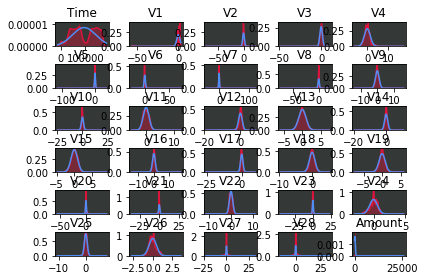

In [45]:
from scipy.stats import norm


fig, axs = plt.subplots(6, 5, squeeze=False)
for i, ax in enumerate(axs.flatten()):
    ax.set_facecolor('xkcd:charcoal')
    ax.set_title(df.columns[i])
    sns.distplot(df.iloc[:, i], ax=ax, fit=norm,
                 color="#DC143C", fit_kws={"color": "#4e8ef5"})
    ax.set_xlabel('')
    
fig.tight_layout(h_pad=-1.5, w_pad=-1.5)
plt.show()

Almost every features comes from the normal distribution except from Time. (A valid alternative is to use Multivariate Gaussian distribution for fraud detection). Time comes from the bimodal distribution which can't be transofmed to gaussian hence discard it. Also because it does not seem to contain extreme values

In [46]:
non_fraud = df[df['Class'] == 0].sample(2000)
len(non_fraud)
fraud = df[df['Class'] == 1]
len(fraud)

#frac=1 retains the 100% of the fraud dataframe
df = non_fraud.append(fraud).sample(frac=1)

#drop the index columns 
df = df.reset_index(drop=True)
df.head()

x = df.drop(['Class'], axis=1).values
y = df['Class'].values

In [47]:
x,y

(array([[ 1.42271000e+05, -1.10570730e+00, -5.44798771e-01, ...,
         -4.51322507e-01, -3.84732098e-01,  1.79500000e+01],
        [ 6.57730000e+04,  1.17517530e+00,  6.66332440e-01, ...,
          5.18750557e-02,  4.20235819e-02,  1.00000000e+00],
        [ 1.64613000e+05,  2.03879874e+00, -2.35739789e-01, ...,
         -7.06584246e-02, -7.06467904e-02,  1.23100000e+01],
        ...,
        [ 4.99180000e+04, -1.31045249e+00, -5.58959054e+00, ...,
         -2.50619107e-01,  2.76959908e-01,  1.49900000e+03],
        [ 1.23036000e+05, -3.03060739e-01,  9.73112853e-01, ...,
          4.58638761e-01,  2.50605139e-01,  2.10000000e+01],
        [ 4.22470000e+04, -2.52401157e+00,  2.09815187e+00, ...,
          4.56022723e-01, -4.05682085e-01,  1.00000000e+00]]),
 array([0, 0, 0, ..., 0, 0, 1]))

In [48]:
from sklearn.manifold import TSNE
from sklearn import preprocessing 

p = TSNE(n_components=2, random_state=24).fit_transform(x)
p

array([[-15.999467 ,  29.040985 ],
       [ 29.72976  ,   6.210179 ],
       [ 22.652077 , -32.362144 ],
       ...,
       [-36.799957 , -30.892313 ],
       [-55.72754  , -13.057592 ],
       [-31.86906  ,  -6.7014647]], dtype=float32)

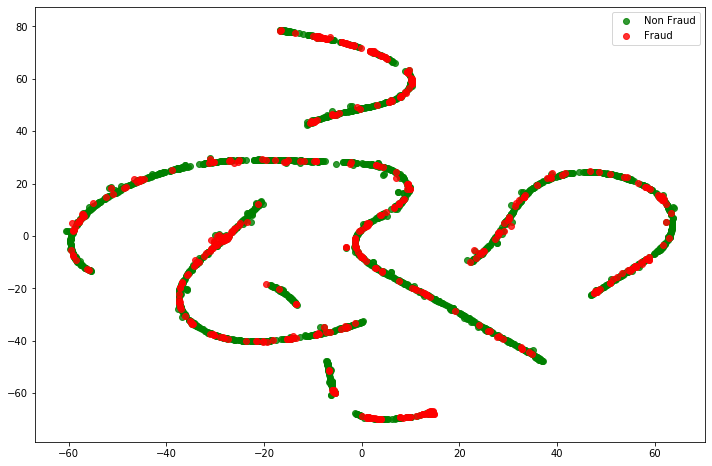

In [49]:
plt.figure(figsize=(12, 8))
plt.scatter(p[np.where(y == 0), 0], p[np.where(y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
plt.scatter(p[np.where(y == 1), 0], p[np.where(y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

plt.legend(loc='best');
plt.show();

To visualize our distribution of data, we use T-SNE. T-SNE or T -Distributed Stochastic Neighbor Embedding is a data decomposition technique that reduces the data into specific dimensions and displays the top n dimensions with maximum information, a technique similar to Principal Component Analysis. 

From the above figure, we can observe that many non-fraud transactions overlap with the fraud transactions in this spiral like shape and thus are difficult to classify using a decision boundary. (The man used a NN to solve this problem, it makes sense) 

## Data Preparation


Anonymized features have been scaled and centered around zero. Time and Amount have been not and not scaling them as well would result in certain ML algo that give weights fo features such LogR and KNN performing much worse. We need to standardize both time and amount features. 

Before setting up the machine learning model, we need to follow three steps:
Preprocess the features Time and Amount with StandardScaler
Split the dataset into train and test data
Deal with the unbalanced dataset

The StandardScaler will transform the data so that its distribution will have a mean value 0 and a standard deviation of 1. This is a crucial step in that the data is transformed to be easily interpreted by the machine learning algorithm.

In [50]:
# scaling TIME to be centered around zero 
scaler_time = StandardScaler()

# diffent functions, same thing 
scaled_time = scaler_time.fit_transform(df[['Time']])
scaled_prova = scaler_time.transform(df[['Time']])
#print(scaled_time == scaled_prova)

scaled_time_list = scaled_time.tolist()
flat_time= [item for sublist in scaled_time_list for item in sublist]
scaled_time = pd.Series(flat_time)

print(scaled_time)

0       1.002666
1      -0.584382
2       1.466179
3      -1.499521
4       1.022873
          ...   
2487    0.819850
2488    1.151583
2489   -0.913314
2490    0.603611
2491   -1.072459
Length: 2492, dtype: float64


In [51]:
# scaling AMOUNT to be centered around zero 
scaler_amount = StandardScaler()

# diffent functions, same thing 
scaled_amount = scaler_amount.fit_transform(df[['Amount']])
scaled_prova2 = scaler_amount.transform(df[['Amount']])
#print(scaled_time == scaled_prova2)

scaled_amount_list = scaled_amount.tolist()
flat_amount= [item for sublist in scaled_amount_list for item in sublist]
scaled_amount = pd.Series(flat_time)

print(scaled_amount)

0       1.002666
1      -0.584382
2       1.466179
3      -1.499521
4       1.022873
          ...   
2487    0.819850
2488    1.151583
2489   -0.913314
2490    0.603611
2491   -1.072459
Length: 2492, dtype: float64


In [52]:
# aggiunto le colonne di amount and time scaled / normalize
df_scaled = pd.concat([df, scaled_amount.rename('Amount_Scaled'), scaled_time.rename('Time_Scaled')], axis=1)
df_scaled.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled,Time_Scaled
1296,115691.0,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,...,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,17.06,1,0.451230,0.451230
558,82114.0,-1.830854,-0.798682,1.016098,-3.528819,-0.608010,-0.963437,-0.481279,0.516818,-0.045432,...,-0.327410,0.267256,-0.240333,-0.366606,0.318742,-0.138810,56.00,0,-0.245368,-0.245368
1794,40630.0,1.136068,0.152667,0.425573,1.273945,-0.114893,0.134596,-0.070946,0.156092,0.090868,...,-0.063593,0.027718,0.623116,-0.328007,0.034923,0.003716,1.00,0,-1.106006,-1.106006
445,11033.0,-0.611442,1.178889,2.160278,0.651527,-0.275571,-0.354033,0.375512,-0.406840,1.308334,...,-0.017627,0.364002,-0.655578,0.193486,-0.205723,-0.008326,11.99,0,-1.720033,-1.720033
950,136745.0,-2.677142,1.062197,-1.054432,-0.783442,0.336972,-0.606109,0.824368,-0.021785,0.564315,...,-0.117473,-0.437242,-0.764246,0.040638,-0.790786,-0.104383,57.24,0,0.888022,0.888022


In [53]:
# drop columns with no normalized values
df_scaled.drop(['Amount', 'Time'], axis=1, inplace=True)
df_scaled.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Time_Scaled
2384,1.432725,-0.648566,0.407069,-1.020791,-0.529290,0.571445,-1.049261,0.093322,-0.495014,0.529879,...,1.016549,-0.259789,-1.238158,0.584004,0.062721,0.060525,0.010860,0,-0.910970,-0.910970
745,0.141697,0.963428,-1.217396,-0.271565,0.659671,-0.749268,1.137750,-0.307995,0.369440,-0.515709,...,0.802671,-0.132889,-0.854354,-0.156065,-0.101915,0.095013,0.024299,0,1.306557,1.306557
276,-0.488722,1.432595,-0.407933,0.993490,0.665111,-0.864493,0.958730,0.195398,-0.694675,-0.191902,...,0.556924,-0.263471,-0.172705,0.041152,-0.360907,0.313476,0.164922,0,1.444956,1.444956
2151,-0.516482,0.660058,1.412807,-1.474267,-0.039579,-0.602142,0.520480,-0.017538,0.377145,0.065818,...,-0.296729,-0.098280,0.003870,-0.254238,0.705892,0.105498,-0.109163,0,-0.738112,-0.738112
1189,1.706398,-0.229303,-1.757747,1.498898,0.617166,-0.329015,0.559020,-0.270534,1.266854,-0.007266,...,0.129988,-0.090292,0.642555,0.348902,-0.595798,-0.081681,-0.046137,0,0.072465,0.072465


## Data Splitting and Balancing

Now we need a training data that will allow the algorithms to pick up the specific characterstics that make a transaction more or less likely to be fraudulent. 
- Random under-sampling to create a training dataset with a balanced class distribution forcing the algo to detect fraudulent transaction

Performance Evaluation on ROC-AUC. It outputs a value between zero and one. If it is above 0.5 it is better than random guessing. 

#### Split into Train and Test

In [54]:
# Splitting Data into Train and Test

# Feature Matrix
X = df_scaled.drop('Class', axis=1)

# Target Vector
y = df_scaled['Class']

print(type(X))
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


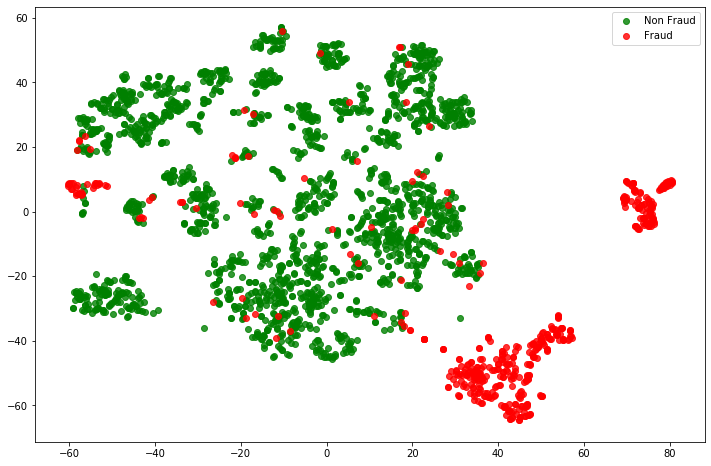

In [61]:
X_TSNE = X.values
y_TSNE = y.values

z = TSNE(n_components=2, random_state=24).fit_transform(X_TSNE)

plt.figure(figsize=(12, 8))
plt.scatter(z[np.where(y_TSNE == 0), 0], z[np.where(y_TSNE == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
plt.scatter(z[np.where(y_TSNE == 1), 0], z[np.where(y_TSNE == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

plt.legend(loc='best');
plt.show();

#### Balancing the Dataset 

The dataset is unbalanced. There's a skwe in the class distribution, our training dataset could be biased and influence the ML algorithm to display results. To address this problem we randomly balance the data with RandomUnderSampler. 
All the fraudelent transaction + the same number of non-fraudulent transactions and concatenated the two.

1    367
0    367
Name: Class, dtype: int64


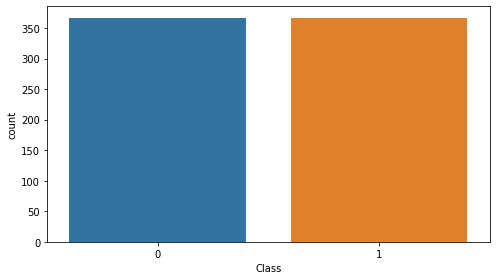

In [55]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# check the balanced data
print(pd.Series(y_rus).value_counts())

# plot the new distribution
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_rus)
plt.tight_layout()

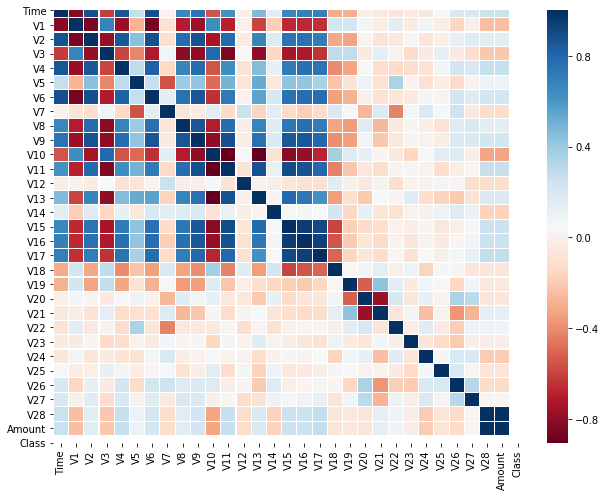

In [56]:
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()

Now that we have a balanced dataset, the correlation matrix shows meaningful correlation between some features, differently from the correlation matrix displayed before

## Modeling - Logistic Regression

We are going to utilize a ML classification method. it is the logistic regression. Logistic regression models are used to determine the odds of a certain class or event existing. In our case, it will establish the probability of a transaction belonging to Class 0 or 1, which is regular or fraudulent.

In [57]:
model_log = LogisticRegression()
model_log.fit(X_rus, y_rus)
y_pred_log = model_log.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       498
           1       0.88      0.91      0.89       125

    accuracy                           0.96       623
   macro avg       0.93      0.94      0.93       623
weighted avg       0.96      0.96      0.96       623

AUC: 0.94



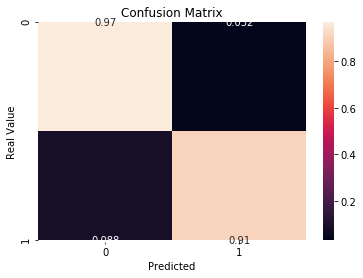

In [59]:
# classification report
print(classification_report(y_test, y_pred_log))

# ROC AUC score
print("AUC: {:.2f}\n".format(roc_auc_score(y_test, y_pred_log)))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_log, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

# aggiungere i true positive ed i false positivi scritti bene come valori numerici 

Notice that the model has an accuracy of 96% and a ROC AUC score of 94%, meaning that our logistic regression performed really well.

From the confusion matrix, we can conclude that 97% of the regular transactions were correctly classified as regular (True Negatives) and 91% of the fraudulent transactions were accurately classified as frauds (True Positives).

In [64]:
filename = 'LogRegression.sav'
pickle.dump(model_log, open(filename, 'wb'))